# Importing Libraries and Loading Data

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

class_name = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

# Information of Dataset

In [3]:
train_images[0,23,23]

194

In [4]:
train_images.shape

(60000, 28, 28)

# Normalizing the dataset to values between 0 and 1 

In [5]:
train_images ,test_images = train_images / 255.0, test_images / 255.0

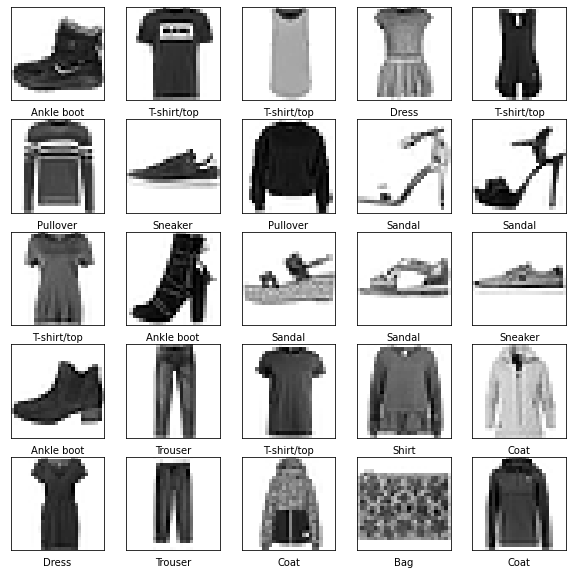

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show()

# Setting up NN

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Fitting the model and evalutating the accuracy on unseen data

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
  21/1875 [..............................] - ETA: 10s - loss: 1.5779 - accuracy: 0.4985

2022-07-25 10:26:35.707876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.5001 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3737 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3383 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3145 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2954 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2812 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2673 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2591 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2479 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2405 - accurac

In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

2022-07-25 10:28:03.660799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.3465 - accuracy: 0.8817 - 1s/epoch - 3ms/step


In [20]:
predictions = model.predict(test_images)

 90/313 [=======>......................] - ETA: 0s

2022-07-25 10:28:04.768859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


# Visualizing the Data

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

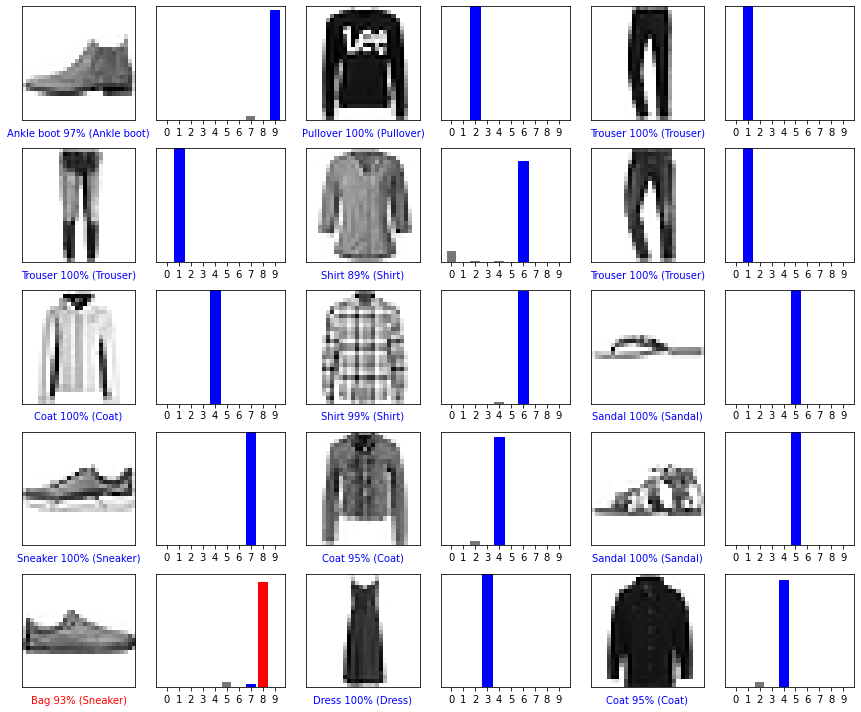

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()